In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf

2024-03-10 21:12:34.052934: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 21:12:34.054301: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 21:12:34.080156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 21:12:34.080190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 21:12:34.080835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

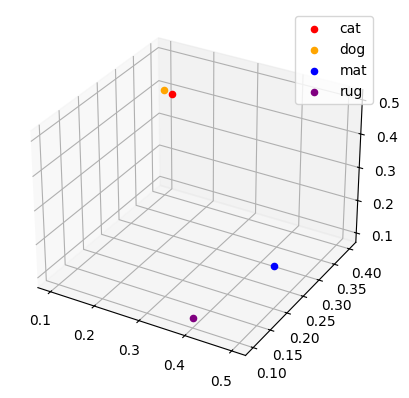

In [18]:
cat = [0.2, 0.3, 0.5]
dog = [0.1, 0.4, 0.4]
mat = [0.5, 0.2, 0.2]
rug = [0.4, 0.1, 0.1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cat[0], cat[1], cat[2], c='r', label='cat')
ax.scatter(dog[0], dog[1], dog[2], c='orange', label='dog')
ax.scatter(mat[0], mat[1], mat[2], c='b', label='mat')
ax.scatter(rug[0], rug[1], rug[2], c='purple', label='rug')
plt.legend()
plt.savefig('embedding_space.png')

In [45]:
sentence = "The cat sat on the mat"

vec_layer = tf.keras.layers.TextVectorization(
    max_tokens=100,
    output_mode="int",
    split="whitespace",
    standardize="lower_and_strip_punctuation",
    output_sequence_length=8,
)
vec_layer.adapt([sentence])

print(vec_layer.get_vocabulary())

['', '[UNK]', 'the', 'sat', 'on', 'mat', 'cat']
tf.Tensor([[2 6 3 4 2 5 0 0]], shape=(1, 8), dtype=int64)


In [47]:
# Process the sentence with the vectorization layer
print(vec_layer([sentence]))

# Now try a new sentence
new_sentence = "The dog sat on the rug"
print(vec_layer([new_sentence]))

tf.Tensor([[2 6 3 4 2 5 0 0]], shape=(1, 8), dtype=int64)
tf.Tensor([[2 1 3 4 2 1 0 0]], shape=(1, 8), dtype=int64)
